# <center>Dataset Anaylsis</center>

In [1]:
%%html
<style>
body {
    font-family: "Apple Script", cursive, sans-serif;
}
</style>  

_importing necessary libraries of Data Science_

In [2]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import os

_making a function for showing image through open cv_

In [3]:
def imshow(img):
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

_________

_read one data out of the dataset and viewing the image_

In [4]:
# reading data using opencv
img = cv2.imread(r"PatientSpiral\sp1-P1.jpg")
grey_img = cv2.imread(r"PatientSpiral\sp1-P1.jpg", cv2.IMREAD_GRAYSCALE)

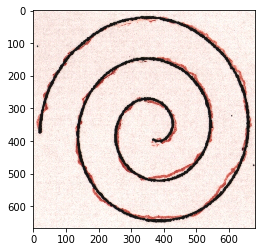

In [5]:
# viewing data using matplotlib
plt.imshow(img)
# plt.imshow(grey_img)

_As we can see from above image, there is two diffrent pattern. one is question and one is answer, and they both overlap each other, we need to decompose them into __question__ and __answer__ to get accurate comparision across the dataset._

In [6]:
Q_img = np.zeros(np.shape(grey_img))
A_img = np.zeros(np.shape(grey_img))

#### extracting question

Setting bias as 30 for black colour

In [7]:
for i,e in enumerate(grey_img):
    for j,f in enumerate(e):
        if f > 30:
            Q_img[i][j] = 255         
        else:
            Q_img[i][j] = 0

If we consider that the darkness of shade is also a factor in diagnosing the 
Parkinson's disease, as it may reflect the muscle strength of the Person then
don't use the else statement in above code<br>
__Points to consider:__
- This may increase the ambiguity as the lightning conditions do not remain constant during image capture
- Muscle strength also depends on the person irrespective of disease (not the age,weight factor)
- Variance of darkness due to age, height, weight factor will be handled later by the model
- Camera quality may also increase ambiguity
- Pen and paper quality also contribute to ambiguity, but has nothing to do with the disease itself.
- not considering the darkness of ink may leave out variables that represent the deterioration of muscle control that is a significant part of Diagnosis

In [8]:
imshow(Q_img)

#### extracting answer

<font TimesNewRoman>Setting +ve bias as __60__ for _removing black colour_ and -ve bias as __160__ for _removing white noise_ </font>

In [9]:
for i,e in enumerate(grey_img):
    for j,f in enumerate(e):
        if f < 60 or f > 160:
            A_img[i][j] = 255
        else:
            A_img[i][j] = 0

Again don't use the else statement in the above code if considering darkness of ink as a variable

In [13]:
imshow(A_img)

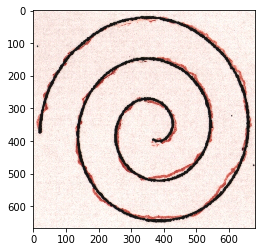

In [10]:
plt.imshow(img)

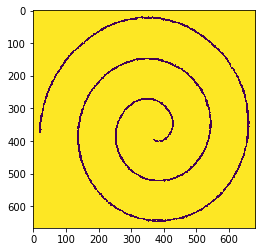

In [11]:
plt.imshow(Q_img)

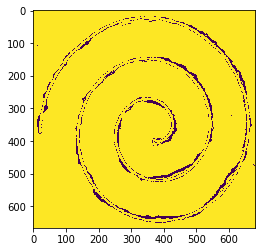

In [12]:
plt.imshow(A_img)